
#INTERN : PARCHAM GUPTA

#DATA SCIENCE AND BUSINESS ANALYTICS Intern at the Sparks Foundation

#TASK 6: Prediction Using Decision Tree Algorithm

##Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.metrics import accuracy_score
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


##Reading the dataset

In [ ]:
df = pd.read_csv('Iris.csv')

##Having a view at top 5 rows of the dataset

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##Exploring the dimensions of the dataset

In [ ]:
df.shape

(150, 6)

##Statistical Analysis of the dataset

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


##Dividing data into independent and dependent variables

In [ ]:
X = df.drop(columns=['Id','Species'])
y = df['Species']

##Splitting data into training and testing subsets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##Defining the base model of decision tree

In [ ]:
model = DecisionTreeClassifier(criterion='entropy')

##Training the decision tree model on the training data

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##Predicting on the testing (unseen) data

In [ ]:
y_pred = model.predict(X_test)

##Checking the accuracy of the model on testing (unseen) data

In [ ]:
accuracy_score(y_test, y_pred)

1.0

##The model has got a perfect accuracy

##Representing the decision tree graphically to visualize the splitting of nodes based on different features along with the entropy changes

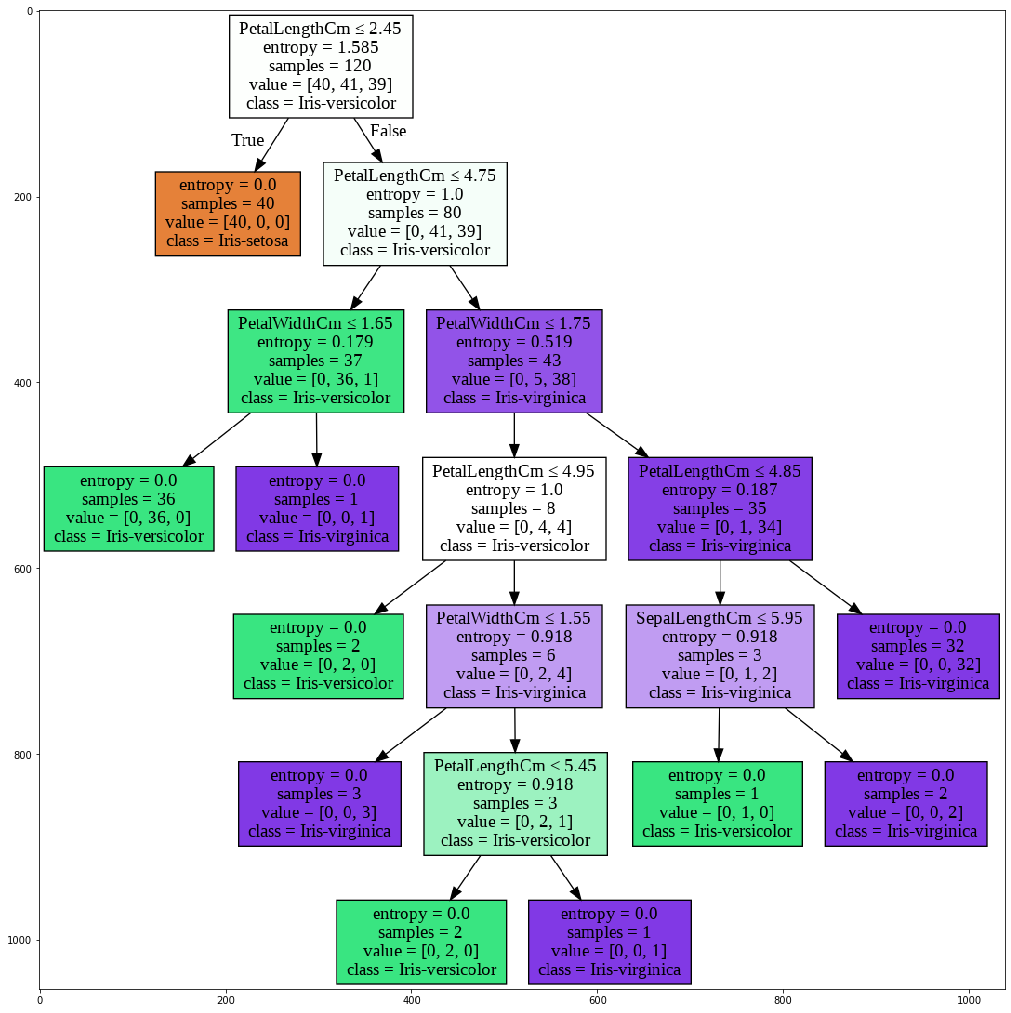

In [ ]:
dot_data = StringIO()
filename = "tree.png"
featureNames = X.columns[0:4]
targetNames = np.unique(y)
out = tree.export_graphviz(model,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train.astype("str")), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(18, 18))
plt.imshow(img,interpolation='nearest')